# Анализ ошибок для задачи 12

Сделать анализ ошибки и нарисовать график зависимости значения ошибки и его стандартного отклонения от объема выборки на обучении и контроле.

In [2]:
from sklearn import cross_validation 
from sklearn import neighbors
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.labelsize'] = 24

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
column_names = ['Type','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv("wine.data",names = column_names, header = None)

In [4]:
data.head(5)


,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


На основе решения задачи 12 выбираем количество соседей равное 14 и используем манхэттонскую метрику.

In [5]:
k = 14
test_size = range(10,95,5)
errors = []
std = []
for s in test_size:
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(data.loc[:, data.columns != 'Type'], data['Type'], 
                                                                     test_size=s/100.0)
    neighbor = neighbors.KNeighborsClassifier(n_neighbors = k, metric= 'manhattan')
    neighbor.fit(X_train,y_train)
    predictions = neighbor.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    errors.append(1-accuracy)
    std.append(np.std(predictions == y_test))

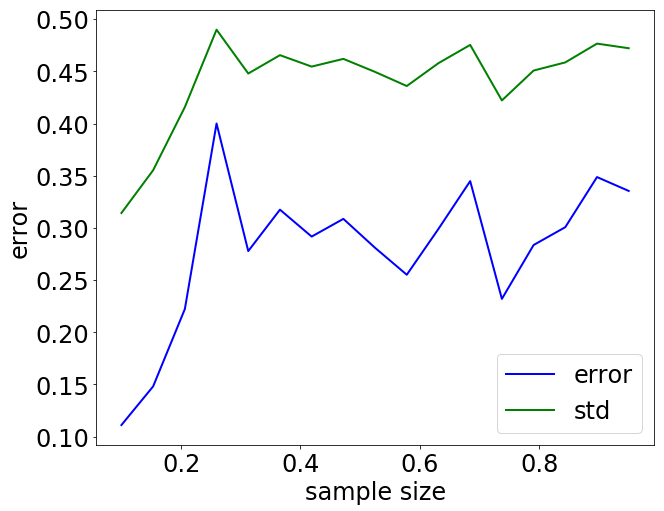

In [13]:
x = np.linspace(0.1, 0.95, 17)
plt.figure(figsize=(10, 8))
plt.plot(x, errors, color='b', label='error')
plt.plot(x, std, color='g', label='std')
plt.xlabel('sample size' )
plt.ylabel('error')
plt.legend()
plt.savefig('error_analysis.png')
plt.show()


## Вывод.

Из графика видно, что наилучший объем тестовой выборки находится между 30 и 40 процентами.
